In [1]:
#%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import scipy as sp
import scipy.io as sp_io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import seaborn as sns
from matplotlib.colors import ListedColormap
colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)


## The CESM2 data

In [45]:
import sys,os
imgdirHisto = "png_Basemap_historical_CESM2"
imgdir1prct = "png_Basemap_1prctCO2_CESM2"
imgdirabrupt4Co2 = "png_Basemap_abrupt4prctCO2_CESM2"   
    
if not os.path.exists(imgdirHisto):
    os.makedirs(imgdirHisto)
if not os.path.exists(imgdir1prct):
    os.makedirs(imgdir1prct)
if not os.path.exists(imgdirabrupt4Co2):
    os.makedirs(imgdirabrupt4Co2)

In [46]:
#grid=Dataset('gridInfoIPSL.nc')
#lat = grid['nav_lat'][:]
#lon = grid['nav_lon'][:]
#H = grid['deptho'][:]

In [76]:
CESM_Ofx= np.load("/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CESM2/Ofx_lat_lon_deptho.npz")
lat=CESM_Ofx["lat"]
lon=CESM_Ofx["lon"]
H = CESM_Ofx["deptho"]
H = H[0]


In [77]:
lat.shape

(384, 320)

In [78]:
lon.shape

(384, 320)

In [79]:
H.shape

(384, 320)

In [80]:
CESM2Hist = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CESM2/CESM2-Historical-198701-201112-EnsembleMLP.npy')

In [81]:
CESM21pct = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CESM2/CESM2-1prctCO2-198701-201112-EnsembleMLP.npy')

In [82]:
CESM2abrupt4pct = np.load('/home/jovyan/DNN4Cli/THOR/ApplicationOnCMIPModels/CESM2/CESM2-abrupt4CO2-198701-201112-EnsembleMLP.npy')

In [83]:
CESM2Hist.shape, CESM21pct.shape, CESM2abrupt4pct.shape, H.shape

((7, 384, 320), (7, 384, 320), (7, 384, 320), (384, 320))

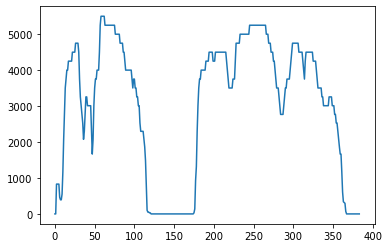

In [84]:
plt.plot(H[:,0])

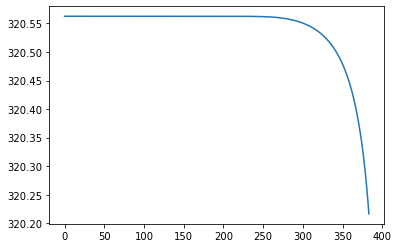

In [85]:
plt.plot(lon[:,0])

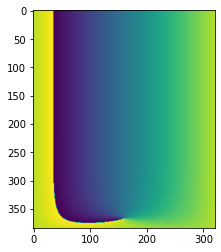

In [86]:
plt.imshow(lon)

In [56]:
H

array([[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [829.60693, 829.60693, 829.60693, ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ]]], dtype=float32)

In [65]:

def makeFig(data, cMin, cMax, cStep, title, ColMap, saveName):
    plt.figure(figsize=(20,12))
    #lons = lon[:,1]
    #lats = lat[1,:]
    #llons, llats = np.roll(lon,100,axis=1),lat
    fig = plt.figure()
    ax = fig.add_axes([0.05,0.05,0.9,0.9])
    m = Basemap(projection='kav7',lon_0=-60,resolution='l')
    im1 = m.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=ColMap,latlon=True, extend='both')
    m.drawmapboundary(fill_color='0.9')
    m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[1,1,0,1])
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title(title)
    cb = m.colorbar(im1,"right", size="5%", pad="9%")
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-Sv", "TR", "SO", "NL"])
    #plt.savefig(saveName, format='png', dpi=500, bbox_inches='tight')
    
def makeFigZoomBathymetry(data,cMin, cMax, cStep, title, saveName, label, labelSpot, llcrnrlon=-65, urcrnrlon=-20, llcrnrlat=35, urcrnrlat=65):
    fig = plt.figure(figsize=(8,8))
    map2 = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat, lon_0=-90, projection='merc', resolution='l')
    map2.drawmapboundary(fill_color='0.9')
    map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
    map2.drawcoastlines()
    map2.fillcontinents()
    map2.drawcountries()
    map2.drawparallels(np.arange(-90.,99.,5.),labels=[1,1,0,1], fontsize=15)
    map2.drawmeridians(np.arange(-180.,180.,20.),labels=[1,1,0,1], fontsize=15)
    im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)
   
    plt.title(title, fontsize=20)
    display(plt.gca().get_ylim())
    #cb = map2.colorbar(im2,"right", size="5%", pad="9%")
    cb = map2.colorbar(im2,"right", size="5%", pad="12%")
    cb.ax.tick_params(labelsize=20) 
    cb.set_ticks([-0.5,0.5, 1.5, 2.5, 3.5, 4.5])
    cb.set_ticklabels(["MD", "S-SV", "N-SV", "TR", "SO", "NL"]) 
    
    im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
    #plt.clabel(im2,fontsize=14,fmt='%1.1f', inline=1)
    yL=plt.gca().get_ylim()
    xL=plt.gca().get_xlim()
    plt.text(xL[1]*0.01, yL[1]*0.1, label, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})
    plt.text(xL[1]*0.02, yL[1]*0.9, labelSpot, fontsize=50, size=40, weight='bold', bbox={'facecolor':'white', 'alpha':0.7})

    #plt.savefig(saveName, format='png', dpi=100, bbox_inches='tight')


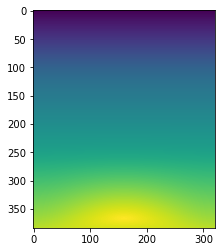

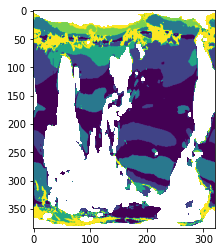

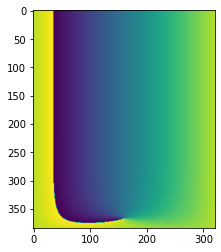

In [58]:
plt.imshow(lat)
plt.figure()
plt.imshow(CESM2Hist[0])
plt.figure()
plt.imshow(lon)

In [60]:
listyears = ["1872","1891","1892","1911","1912","1931","1932","1951","1952","1971","1972","1991","1992","2011"]

<ipython-input-65-7e61e82c60be>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-65-7e61e82c60be>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_

(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-65-7e61e82c60be>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_

(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-65-7e61e82c60be>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_

(0.0, 9938687.360683784)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1430: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/matplotlib/contour.py:1431: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipython-input-65-7e61e82c60be>:41: UserWarning: No contour levels were found within the data range.
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-65-7e61e82c60be>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon[:,:3],lat[:,:3],H[:,:3], colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


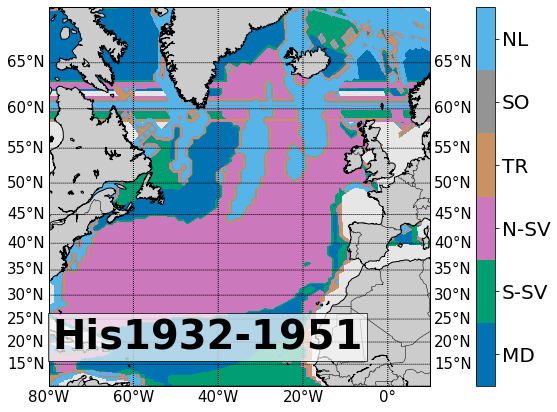

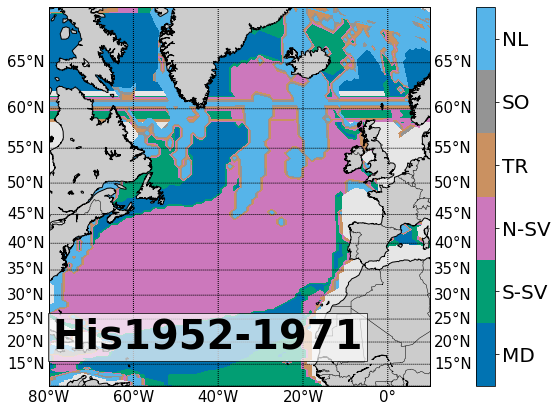

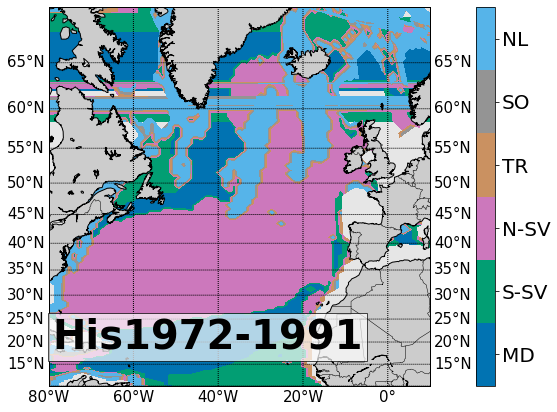

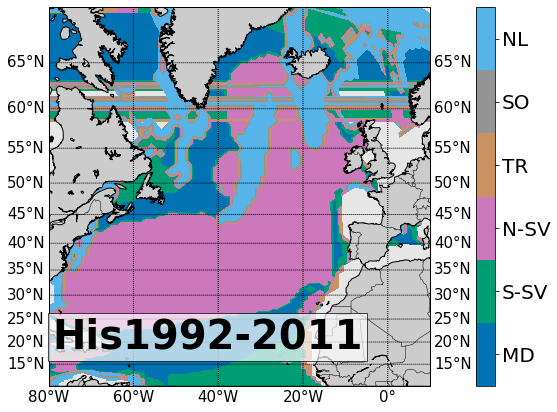

In [66]:
for i in range(3, 7):
    makeFigZoomBathymetry(CESM2Hist[i], -1,6,1,'', 'CESM2_basemap_historical_'+str(listyears[2*i])+str(listyears[2*i+1])+'.png', str("His"+listyears[2*i])+"-"+str(listyears[2*i+1]), '',llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)
    plt.savefig('/home/jovyan/DNN4Cli/figures/CESM2/png_Basemap_historical_CESM2/'+str("CESM2His"+listyears[2*i])+str(listyears[2*i+1])+'.png')

In [62]:
natVar1pct=np.zeros(CESM2Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar1pct[np.count_nonzero(CESM21pct[4:7] == n, axis = 0)>2]=n

natVar4=np.zeros(CESM2Hist[0].shape)*np.nan
for n in np.arange(0,8):
    natVar4[np.count_nonzero(CESM2abrupt4pct[3:7] == n, axis = 0)>2]=n

In [28]:
natVar4.shape

(384, 320)

<ipython-input-19-b749ee050b61>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 9938687.360683784)

<ipython-input-19-b749ee050b61>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))
<ipython-input-19-b749ee050b61>:31: UserWarning: The following kwargs were not used by contour: 'shading'
  im2=map2.contourf(lon,lat,data,np.arange(cMin, cMax, cStep),shading='flat',cmap=my_cmap,latlon=True)


(0.0, 9938687.360683784)

<ipython-input-19-b749ee050b61>:41: UserWarning: The following kwargs were not used by contour: 'linethickness'
  im2=map2.contour(lon,lat,H, colors='k',latlon=True, linethickness=2, levels=np.linspace(0,6000,10))


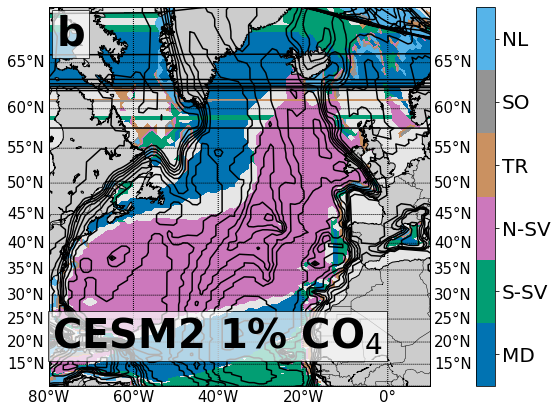

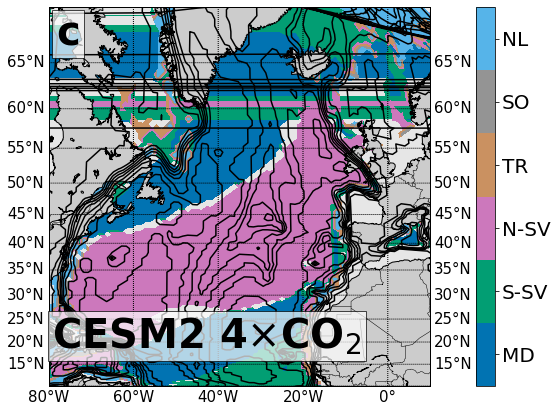

In [22]:
makeFigZoomBathymetry(natVar1pct, -1,6,1,'', 'CESM2_1%CO2_NAtl_noNatVar_EnsembleMLP_prez.png', r'CESM2 1% CO$_4$', 'b', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

makeFigZoomBathymetry(natVar4, -1,6,1,'', 'CESM2_abrupt4xO2_NAtl_noNatVar_EnsembleMLP_prez.png', r'CESM2 4$\times$CO$_2$', 'c', llcrnrlon=-80, urcrnrlon=10, llcrnrlat=10, urcrnrlat=70)

In [27]:
import os
import imageio

png_dir = '/home/jovyan/DNN4Cli/figures/CESM2/png_Basemap_historical_CESM2/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('png_Basemap_historical_CESM2/png_Basemap_Historical_CESM2.gif', images, fps=1)